In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tifffile
import os
from config import *
from model import Click_ref
from dataloader import *
from tqdm import tqdm
from beautifultable import BeautifulTable
from metrics import *
from matching import matching
from skimage.morphology import disk
import neptune.new as neptune
import numpy as np
from scipy.ndimage import gaussian_filter
from skimage.measure import label
from tqdm import trange
from tiloss import Finalloss
from glob import glob
from create_gt_grids import Gtgrid
from grids_to_clicks import Grid_to_click

/home/ahabis/.local/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
/tmp/ipykernel_1426692/586032062.py:14: NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.
  import neptune.new as neptune


In [2]:
baseline = 'stardist_modified'
path_baseline = os.path.join(path_pannuke, baseline)
path_contour_baseline = os.path.join(path_pannuke, 'contour_'+str(baseline))
path_binary_baseline = os.path.join(path_pannuke, 'binary_'+str(baseline))
path_click_gen_baseline = os.path.join(path_pannuke, 'click_gen_'+str(baseline))
path_click_baseline = os.path.join(path_pannuke, 'click_'+str(baseline))

In [3]:
click_ref = Click_ref(7,3)
click_ref = click_ref.load_state_dict(torch.load('weights'))

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
# count_parameters(click_ref)

fp 6
merge 0
split 1
fn 12


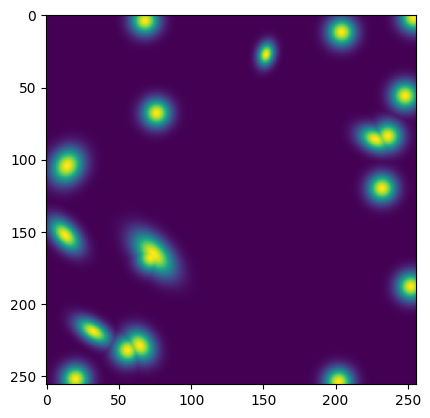

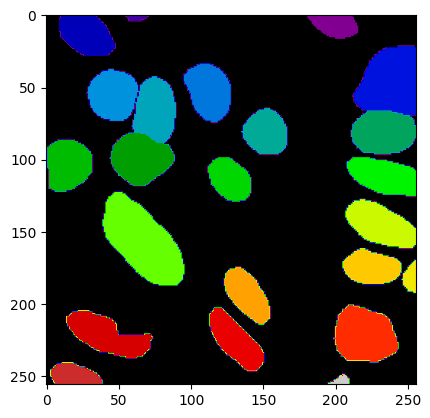

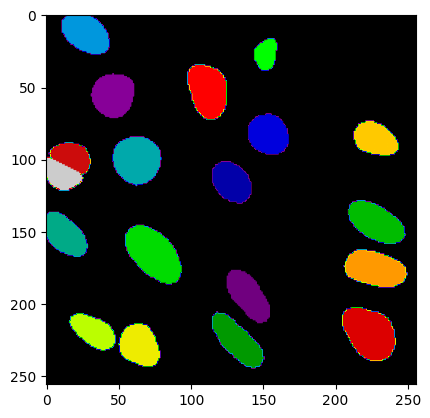

In [13]:
filenames = os.listdir(path_stardist)
##93 pb
filename = filenames[95]
img_gt = tifffile.imread(os.path.join(path_gt, filename))
img_baseline = tifffile.imread(os.path.join(path_stardist_modified, filename))
grid_creator = Gtgrid(img_gt, img_baseline, area=0)
grid = grid_creator.create_grid()
click_generator = Grid_to_click(grid, filename, path_stardist_modified)
click = click_generator.final_click()
plt.imshow(np.amax(click, axis = -1))
plt.show()
plt.imshow(img_gt, cmap = 'nipy_spectral')
plt.show()
plt.imshow(img_baseline, cmap = 'nipy_spectral')
plt.show()


In [5]:
plt.imshow(img_stardist)
plt.show()

NameError: name 'img_stardist' is not defined

In [6]:
click_ref = Click_ref(7,3)
click_ref.load_state_dict(torch.load('weights'))
click_ref.eval()

Click_ref(
  (relu): ReLU()
  (softmax): Softmax(dim=1)
  (sigmoid): Sigmoid()
  (conv_corr1): Conv2d(7, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_corr2): Conv2d_new(
    (conv): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (relu): ReLU()
  )
  (conv_corr3): Conv2d_new(
    (conv): Conv2d(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (relu): ReLU()
  )
  (conv_corr4): Conv2d_new(
    (conv): Conv2d(64, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (relu): ReLU()
  )
  (conv_corr5): Conv2d_new(
    (conv): Conv2d(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (relu): ReLU()
  )
  (conv_corr6): Conv2d_new(
    (conv): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (relu): ReLU()
  )
  (conv_corr7): Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_prob1): Conv2d(7, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_prob2): Conv2d_new(
    (

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


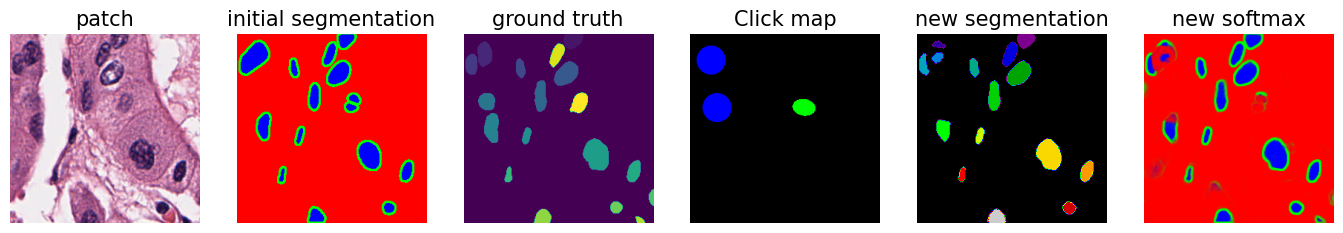

new segmentation
(0.8666666666666667, 0.7222222222222222, 0.787383231998509, {1: 1, 3: 5, 4: 6, 5: 7, 6: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 14: 14, 15: 15, 17: 3})
stardist
(0.8, 0.6666666666666666, 0.7267771973654327, {1: 12, 4: 8, 5: 2, 6: 10, 8: 14, 9: 7, 10: 4, 11: 3, 12: 13, 14: 1, 15: 15, 17: 6})


['nuclei_2_2470.tif',
 'nuclei_1_847.tif',
 'nuclei_3_212.tif',
 'nuclei_1_1062.tif',
 'nuclei_1_2409.tif',
 'nuclei_3_782.tif',
 'nuclei_1_994.tif',
 'nuclei_2_1884.tif',
 'nuclei_3_2328.tif',
 'nuclei_2_458.tif',
 'nuclei_1_2259.tif',
 'nuclei_3_294.tif',
 'nuclei_2_1662.tif',
 'nuclei_3_2460.tif',
 'nuclei_2_490.tif',
 'nuclei_2_2085.tif',
 'nuclei_1_666.tif',
 'nuclei_1_2092.tif',
 'nuclei_2_334.tif',
 'nuclei_3_2450.tif',
 'nuclei_1_744.tif',
 'nuclei_3_3.tif',
 'nuclei_3_242.tif',
 'nuclei_1_99.tif',
 'nuclei_1_62.tif',
 'nuclei_3_1562.tif',
 'nuclei_2_1363.tif',
 'nuclei_1_200.tif',
 'nuclei_1_613.tif',
 'nuclei_1_2337.tif',
 'nuclei_3_881.tif',
 'nuclei_1_416.tif',
 'nuclei_1_2206.tif',
 'nuclei_3_470.tif',
 'nuclei_1_751.tif',
 'nuclei_1_2025.tif',
 'nuclei_1_1575.tif',
 'nuclei_3_2223.tif',
 'nuclei_1_1339.tif',
 'nuclei_2_2170.tif',
 'nuclei_3_2019.tif',
 'nuclei_1_2161.tif',
 'nuclei_2_2006.tif',
 'nuclei_1_2387.tif',
 'nuclei_1_1165.tif',
 'nuclei_1_2603.tif',
 'nuclei_3_1

In [20]:
filename = list(dataloaders["test"].dataset.dataframe["filename"])[41]
click = np.amax(tifffile.imread(os.path.join(path_click_stardist_modified,filename)),-1)
bin_, img_gt= predict_click(filename = filename,
                            model=click_ref,
                            gen=False,
                            baseline = baseline,
                            count_erase= 30)

os.listdir(path_stardist_modified)

In [20]:
dataset_test = CustomImageDataset(path_contour_baseline =path_contour_baseline,
                                   path_baseline = path_baseline,
                                   path_click_gen = path_click_baseline,
                                   path_click = path_click_baseline,
                                   path_image = path_images,
                                   path_contour_gt = path_contour_gt,
                                   path_gt = path_gt,
                                   dataframe = df_test,
                                   augmenter_bool = False)


loader_test = DataLoader(
    batch_size = parameters['batch_size'],
    dataset = dataset_test,
    num_workers = 16,
    shuffle = False)

In [21]:
list_preds = []
list_filenames = []

with torch.no_grad():
    
    for batch in tqdm(loader_test):
        
        images    = batch[0].cuda()
        stardists    = batch[1].cuda()
        outputs    = batch[2].cuda()

        pred_outputs = click_ref(images, stardists)
        list_preds.append(pred_outputs)
        
preds = np.transpose(torch.cat(list_preds).reshape(-1,3,256,256).cpu().detach().numpy(),(0,2,3,1))

100%|██████████| 38/38 [00:18<00:00,  2.11it/s]


In [22]:
star_P, star_R, star_F1, star_pan,star_AJI,star_DICE = [] ,[], [], [], [], []
new_P, new_R, new_F1, new_pan,new_AJI,new_DICE = [], [], [], [], [], []
t = trange(preds.shape[0])


for i in t:
        filename = list(loader_test.dataset.dataframe['filename'])[i]
        click = tifffile.imread(os.path.join(path_click_gen_baseline, filename))
 
        img = tifffile.imread(os.path.join(path_images, filename))/255.
        img_new = model_predict_batch(preds[i],
                                      count_erase= 15,
                                      radius=3)
        img_stardist =  tifffile.imread(os.path.join(path_baseline,filename)).astype(int)
        img_gt =  tifffile.imread(os.path.join(path_gt,filename)).astype(int)
        img_gt = remove_wrong_annotation(img_gt)

        precision_star, recall_star, F1_star, matched_pairs = calculate_precision_recall(img_stardist,img_gt)
        precision_seg, recall_seg, F1_seg, matched_pairs = calculate_precision_recall(img_new,img_gt)

        star_P.append(precision_star)
        star_R.append(recall_star)
        star_F1.append(F1_star)
        star_AJI.append(AJI(img_stardist,img_gt))
        star_DICE.append(DICE(img_stardist,img_gt))

        new_P.append(precision_seg)
        new_R.append(recall_seg)
        new_F1.append(F1_seg)
        new_AJI.append(AJI(img_new,img_gt))
        new_DICE.append(DICE(img_new,img_gt))
        precision_diff = np.mean(new_P) - np.mean(star_P)
        recall_diff = np.mean(new_R) - np.mean(star_R)

        t.set_description('precision diff:'+ str(np.round(precision_diff, 4)) +' || ' +'recall diff:'+ str(np.round(recall_diff, 4)))
        t.refresh()

table = BeautifulTable()

table.columns.header = ["new segmentation","stardist"]
table.rows.append([np.mean(np.array(new_P)),np.mean(np.array(star_P))])
table.rows.append([np.mean(np.array(new_R)),np.mean(np.array(star_R))])
table.rows.append([np.mean(np.array(new_F1)),np.mean(np.array(star_F1))])
table.rows.append([np.mean(np.array(new_AJI)),np.mean(np.array(star_AJI))])
table.rows.append([np.mean(np.array(new_DICE)),np.mean(np.array(star_DICE))])
table.rows.header = ["precision", "recall",'F1', "AJI", "DICE"]


precision diff:0.0711 || recall diff:0.233: 100%|██████████| 1185/1185 [09:15<00:00,  2.14it/s] 


In [23]:
print(table)

+-----------+------------------+----------+
|           | new segmentation | stardist |
+-----------+------------------+----------+
| precision |      0.904       |  0.833   |
+-----------+------------------+----------+
|  recall   |      0.808       |  0.575   |
+-----------+------------------+----------+
|    F1     |      0.825       |  0.654   |
+-----------+------------------+----------+
|    AJI    |      0.709       |  0.428   |
+-----------+------------------+----------+
|   DICE    |       0.82       |  0.574   |
+-----------+------------------+----------+
